### Statistical Models, Supervised Learning, and Function Approximation

Our goal is to find a useful approximation $ \hat{f}(x) $ to the function $ f(x) $ that underlies the predictive relationship between the inputs and outputs. In the theoretical setting of Section 2.4, we saw that squared error loss leads us to the regression function:
$$
f(x) = \mathbb{E}(Y | X = x)
$$
for a quantitative response.

The class of nearest-neighbor methods can be viewed as direct estimates of this conditional expectation, but they can fail in at least two ways:
- If the dimension of the input space is high, the nearest neighbors need not be close to the target point, which can result in large errors.
- If special structure is known to exist, this can be used to reduce both the bias and the variance of the estimates.

We anticipate using other classes of models for $ f(x) $, in many cases specifically designed to overcome the dimensionality problems. Here, we discuss a framework for incorporating them into the prediction problem.

### A Statistical Model for the Joint Distribution \( \Pr(X, Y) \)

Suppose in fact that our data arose from a statistical model:
$$
Y = f(X) + \epsilon,
$$
where the random error $ \epsilon $ has $ \mathbb{E}(\epsilon) = 0 $ and is independent of $ X $. Note that for this model, $ f(x) = \mathbb{E}(Y | X = x) $, and in fact, the conditional distribution $ \Pr(Y | X) $ depends on $ X $ only through the conditional mean $ f(x) $.

The additive error model is a useful approximation to the truth. For most systems, the input-output pairs $ (X, Y) $ will not have a deterministic relationship $ Y = f(X) $. Generally, there will be other unmeasured variables that also contribute to $ Y $, including measurement error. The additive model assumes that we can capture all these departures from a deterministic relationship via the error $ \epsilon $.

For some problems, a deterministic relationship does hold. Many of the classification problems studied in machine learning are of this form, where the response surface can be thought of as a colored map defined in $ \mathbb{R}^p $. The training data consist of colored examples from the map $ \{x_i, g_i\} $, and the goal is to be able to color any point. Here, the function is deterministic, and the randomness enters through the $ x $ location of the training points.

For the moment, we will not pursue such problems, but we will see that they can be handled by techniques appropriate for the error-based models.

The assumption in eqn. 2 that the errors are independent and identically distributed is not strictly necessary, but seems to be at the back of our mind.When we average squared errors uniformly in our Expected Prediction Error (EPE) criterion, it becomes natural to use least squares as a data criterion for model estimation as in (2.1). Simple modifications can be made to avoid the independence assumption; for example, we can have $ \text{Var}(Y | X = x) = \sigma(x) $, where both the mean and variance depend on $ X $. In general, the conditional distribution $ \Pr(Y | X) $ can depend on $ X $ in complicated ways, but the additive error model precludes these.

So far, we have concentrated on the quantitative response. Additive error models are typically not used for qualitative outputs $ G $. In this case, the target function $ p(X) $ is the conditional density $ \Pr(G | X) $, and this is modeled directly. For example, for two-class data, it is often reasonable to assume that the data arise from independent binary trials, with the probability of one particular outcome being $ p(X) $, and the other $ 1 - p(X) $. 

Thus, if $ Y $ is the 0–1 coded version of $ G $, then:
$$
\mathbb{E}(Y | X = x) = p(x),
$$
but the variance depends on \( x \) as well:
$$
\text{Var}(Y | X = x) = p(x)[1 - p(x)].
$$




## Supervised Learning

Before we launch into more statistically oriented jargon, we present the function-fitting paradigm from a machine learning point of view. Suppose for simplicity that the errors are additive and that the model $ Y = f(X) + \epsilon $ is a reasonable assumption. Supervised learning attempts to learn $ f $ by example through a teacher. One observes the system under study, both the inputs and outputs, and assembles a training set of observations $ T = \{(x_i, y_i), i = 1, \dots, N\} $. The observed input values to the system $ x_i $ are also fed into an artificial system, known as a learning algorithm (usually a computer program), which also produces outputs $ \hat{f}(x_i) $ in response to the inputs.The learning algorithm has the property that it can modify its input/output relationship $ \hat{f} $ in response to differences $ y_i - \hat{f}(x_i) $ between the original and generated outputs. This process is known as *learning by example*. Upon completion of the learning process, the hope is that the artificial and real outputs will be close enough to be useful for all sets of inputs likely to be encountered in practice.## Function Approximation

The learning paradigm from the previous section has motivated research into the supervised learning problem in the fields of machine learning (with analogies to human reasoning) and neural networks (with biological analogies to the brain). The approach taken in applied mathematics and statistics has been from the perspective of function approximation and estimation.

Here, the data pairs $ \{x_i, y_i\} $ are viewed as points in a $ (p+1) $-dimensional Euclidean space. The function $ f(x) $ has domain equal to the $ p $-dimensional input subspace, and is related to the data via a model such as:

$$
y_i = f(x_i) + \epsilon_i
$$

For convenience, we assume the domain is $ \mathbb{R}^p $, although in general, the inputs can be of mixed types. The goal is to obtain a useful approximation to $ f(x) $ for all $ x $ in some region of $ \mathbb{R}^p $, given the representations in $ T $.

Although less glamorous than the learning paradigm, treating supervised learning as a problem in function approximation allows us to apply geometrical concepts of Euclidean spaces and mathematical concepts of probabilistic inference to the problem.

Many approximations have associated parameters $ \theta $ that can be modified to suit the data. For example, the linear model:

$$
f(x) = x^\top \beta
$$

has \( \theta = \beta \). Another class of useful approximators can be expressed as linear basis expansions:

$$
f_\theta(x) = \sum_{k=1}^{K} h_k(x) \theta_k
$$

where the $ h_k $ are functions or transformations of the input vector $ x $. Traditional examples are polynomial and trigonometric expansions. We also encounter nonlinear expansions, such as the sigmoid transformation common to neural network models:

$$
h_k(x) = \frac{1}{1 + \exp(-x^\top \beta_k)}
$$

We can use least squares to estimate the parameters \( \theta \) by minimizing the residual sum of squares (RSS):

$$
RSS(\theta) = \sum_{i=1}^{N} (y_i - f_\theta(x_i))^2
$$

For the linear model, we get a simple closed-form solution to this minimization problem. This is also true for the basis function methods if the basis functions themselves do not have any hidden parameters. Otherwise, the solution requires iterative or numerical optimization.

While least squares is generally convenient, it is not the only criterion used, and in some cases, it may not be the most suitable.

## Maximum Likelihood Estimation (MLE)

The principle for estimation is **maximum likelihood estimation**. Suppose we have a random sample \( y_i \), \( i = 1, \ldots, N \), from a density \( \text{Pr}_\theta(y) \) indexed by some parameters \( \theta \). The log-probability of the observed sample is:

$$
L(\theta) = \sum_{i=1}^{N} \log \text{Pr}_\theta(y_i).
$$
\tag{2.33}
$$

The principle of maximum likelihood assumes that the most reasonable values for \( \theta \) are those for which the probability of the observed sample is largest.

For the **additive error model** \( Y = f_\theta(X) + \epsilon \), with \( \epsilon \sim \mathcal{N}(0, \sigma^2) \), least squares estimation is equivalent to maximum likelihood estimation using the conditional likelihood:

$$
\text{Pr}(Y|X, \theta) = \mathcal{N}(f_\theta(X), \sigma^2).
$$
\tag{2.34}
$$

Although the additional assumption of normality seems restrictive, the result remains the same. The log-likelihood of the data is:

$$
L(\theta) = -\frac{N}{2} \log(2\pi) - N \log \sigma - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (y_i - f_\theta(x_i))^2,
$$
\tag{2.35}
$$

and the only term involving $ \theta $ is the last, which is **RSS(θ)** up to a scalar negative multiplier.
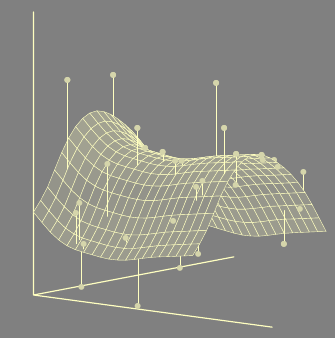

FIGURE 10. Least squares fitting of a function of two inputs. The parameters
of fθ (x) are chosen so as to minimize the sum-of-squared vertical errors.

### Multinomial Likelihood

A more interesting example is the **multinomial likelihood** for the regression function $ \text{Pr}(G|X) $ for a qualitative output $ G $. Suppose we have a model $ \text{Pr}(G = G_k | X = x) = p_{k,\theta}(x), k = 1, \ldots, K $, for the conditional probability of each class given $ X $, indexed by the parameter vector $ \theta $. The log-likelihood (also referred to as the **cross-entropy**) is:

$$
L(\theta) = \sum_{i=1}^{N} \log p_{g_i, \theta}(x_i),
$$
\tag{2.36}
$$

and when maximized, it delivers the values of $ \theta $ that best fit the data in this likelihood sense.


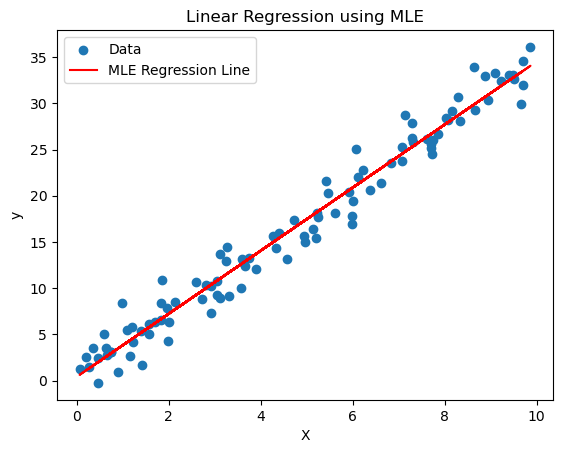

Estimated parameters (theta) from MLE:
 [[0.43019232]
 [3.40804535]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(42)
N = 100
X = np.random.rand(N, 1) * 10  # N data points, single feature
y_true = 3.5 * X + np.random.randn(N, 1) * 2  # True model with noise

# Add bias term (intercept) to X
X_b = np.c_[np.ones((N, 1)), X]

# Closed-form solution for the linear regression model (Normal Equation)
theta_mle = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_true)

# Predictions
y_pred = X_b.dot(theta_mle)

# Plot the data and the regression line
plt.scatter(X, y_true, label='Data')
plt.plot(X, y_pred, color='red', label='MLE Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using MLE')
plt.legend()
plt.show()

# Print the MLE estimated parameters
print("Estimated parameters (theta) from MLE:\n", theta_mle)


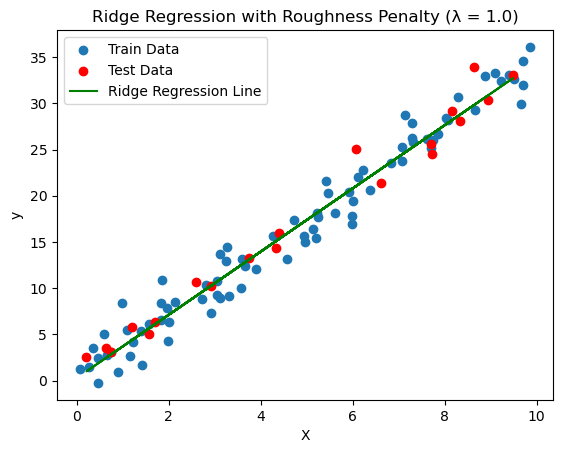

Estimated parameters (theta) from Ridge Regression:
 [[0.29613299]
 [3.41673693]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic data for regression
np.random.seed(42)
N = 100
X = np.random.rand(N, 1) * 10  # N data points, single feature
y = 3.5 * X + np.random.randn(N, 1) * 2  # True model with noise

# Add bias term (intercept) to X
X_b = np.c_[np.ones((N, 1)), X]

# Ridge regression function with regularization parameter lambda
def ridge_regression(X, y, lambda_):
    # Closed-form solution for Ridge regression: (X^T X + lambda * I)^-1 X^T y
    I = np.eye(X.shape[1])  # Identity matrix
    theta_ridge = np.linalg.inv(X.T.dot(X) + lambda_ * I).dot(X.T).dot(y)
    return theta_ridge

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# Train ridge regression model
lambda_ = 1.0  # Regularization parameter
theta_ridge = ridge_regression(X_train, y_train, lambda_)

# Predict on the test set
y_pred = X_test.dot(theta_ridge)

# Plot the training data and the ridge regression line
plt.scatter(X_train[:, 1], y_train, label='Train Data')
plt.scatter(X_test[:, 1], y_test, color='red', label='Test Data')
plt.plot(X_test[:, 1], y_pred, color='green', label='Ridge Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression with Roughness Penalty (λ = 1.0)')
plt.legend()
plt.show()

# Print the estimated parameters
print("Estimated parameters (theta) from Ridge Regression:\n", theta_ridge)
